In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
savefolder = 'Figures/S21_NovelObject/'

In [3]:
from utils.predictiveNet import PredictiveNet
from utils.env import make_env, plot_env, get_viewpoint
import matplotlib.pyplot as plt
import copy
from utils.agent import RandomActionAgent
import numpy as np
import itertools
from utils.general import saveFig

In [4]:
#Example Net
netname_mask = 'thRNN_5win'
#netname_1mask = 'thRNN_1win'
#exseed = 8
#netfolder = '/multisteptest/'
exseed = 102
netfolder = '/theta_seqdur/'
predictiveNet_masked = PredictiveNet.loadNet(netfolder+netname_mask+'-400-s'+str(exseed))

netname_rollout = 'thcycRNN_5win_full'
predictiveNet_rollout = PredictiveNet.loadNet(netfolder+netname_rollout+'-400-s'+str(exseed))

Net Loaded from pathname
Net Loaded from pathname


In [5]:
from analysis.ObjectMemoryTask import ObjectMemoryTask

In [35]:
OMT = ObjectMemoryTask(predictiveNet_rollout, num_trials=500, trial_duration=500, #1000 worked diff net
                       lr_trials=4, lr_groups = [1]) #lr 2, all groups worked diff net (k=6 masked - 9/18/23)

Training pRNN on cpu...
loss: 0.0016, sparsity: 0.41, meanrate: 0.28 [    0\  500]
loss: 0.0018, sparsity: 0.41, meanrate: 0.28 [   50\  500]
loss: 0.0013, sparsity: 0.4, meanrate: 0.27 [  100\  500]
loss: 0.0016, sparsity: 0.41, meanrate: 0.27 [  150\  500]
loss: 0.0015, sparsity: 0.41, meanrate: 0.27 [  200\  500]
loss: 0.0013, sparsity: 0.4, meanrate: 0.27 [  250\  500]
loss: 0.0016, sparsity: 0.41, meanrate: 0.28 [  300\  500]
loss: 0.0013, sparsity: 0.4, meanrate: 0.27 [  350\  500]
loss: 0.0015, sparsity: 0.41, meanrate: 0.27 [  400\  500]
loss: 0.0014, sparsity: 0.41, meanrate: 0.27 [  450\  500]
loss: 0.0012, sparsity: 0.4, meanrate: 0.27 [  499\  500]
Epoch Complete. Back to the cpu


In [12]:
#OMT.testTrial = OMT.getTestTrial(OMT.pN_post, OMT.pN, OMT.env_object, timesteps=2500)

In [ ]:
phases = np.arange(6)
for pidx,phase in enumerate(phases):
    OMT.objectLearning = OMT.quantifyObjectLearning(OMT.testTrial,whichPhase=phase)
    OMT.ObjectLearningFigure(whichview=105,netname=netname_rollout+str(phase),savefolder=savefolder)

In [8]:
trial_duration = 1000
trial_duration = 500
num_trials = [1,5,25,125,250,500]
num_trials = [1,5,25,125,250,500]
losswindow = 5
lrs = [0,1,2,4,8]
lrs = [1,2,4,8]
#lrgroups = [itertools.combinations([0, 1, 2],r) for r in range(1,4)]
#lrgroups = [list(i) for i in itertools.chain.from_iterable(lrgroups)]

#Test: only those with output weights
lrgroups = [[1],[0,1],[0,1,2]]
lrgroups = [[1]]

#Test: all... for legacy theta net
#lrgroups = [[0]]

phases = np.arange(0,6)
#nets = [predictiveNet_masked,predictiveNet_rollout]
nets = [predictiveNet_masked, predictiveNet_rollout]

object_pred_loss = np.ones((len(lrgroups),len(lrs),len(num_trials),len(phases),len(nets)))
goalmodulation = np.ones((len(lrgroups),len(lrs),len(num_trials),len(phases),len(nets)))
ctlmodulation_diffcolor = np.ones((len(lrgroups),len(lrs),len(num_trials),len(phases),len(nets)))
ctlmodulation_diffloc = np.ones((len(lrgroups),len(lrs),len(num_trials),len(phases),len(nets)))

for lidx,lr in enumerate(lrs):
    print("lr: "+str(lidx))
    for gidx,group in enumerate(lrgroups):
        print("gr: "+str(gidx))
        for nidx,net in enumerate(nets):
            print("net: "+str(nidx))

            trialcounter = 0
            continueTraining = False
            resetOptimizer = False
            nTrials = 0
            #pN_post = #OMT.pN
            pN_post = net
            while trialcounter<len(num_trials):
                nTrials = num_trials[trialcounter]-nTrials
                pN_post = OMT.trainNovelObject(pN_post, OMT.env_object, 
                                                num_trials=nTrials, 
                                                sequence_duration = trial_duration, 
                                                lr_trials=lr, lrgroups=group,
                                                resetOptimizer = resetOptimizer,
                                                continueTraining=continueTraining)

                testTrial = OMT.getTestTrial(pN_post,net,OMT.env)
                netphases = np.arange(testTrial['obs_pred'].size(0))
                for pidx,phase in enumerate(netphases):
                    objectLearning = OMT.quantifyObjectLearning(testTrial,whichPhase=phase)

                    object_pred_loss[gidx,lidx,trialcounter,pidx,nidx] = np.mean(pN_post.TrainingSaver['loss'][-losswindow:])

                    #check the recall
                    goalmodulation[gidx,lidx,trialcounter,pidx,nidx] = objectLearning['goalmodulation']
                    ctlmodulation_diffcolor[gidx,lidx,trialcounter,pidx,nidx] = objectLearning['ctlmodulation_diffcolor']
                    ctlmodulation_diffloc[gidx,lidx,trialcounter,pidx,nidx] = objectLearning['ctlmodulation_diffloc']

                continueTraining = True
                resetOptimizer = False
                nTrials = num_trials[trialcounter]
                trialcounter+=1



lr: 0
gr: 0
net: 0
Training pRNN on cpu...
loss: 0.002, sparsity: 0.36, meanrate: 0.18 [    0\    1]
Epoch Complete. Back to the cpu
continuing training
Training pRNN on cpu...
loss: 0.0017, sparsity: 0.36, meanrate: 0.18 [    0\    4]
loss: 0.0017, sparsity: 0.36, meanrate: 0.18 [    2\    4]
loss: 0.0018, sparsity: 0.37, meanrate: 0.18 [    3\    4]
Epoch Complete. Back to the cpu
continuing training
Training pRNN on cpu...
loss: 0.002, sparsity: 0.37, meanrate: 0.18 [    0\   20]
loss: 0.0017, sparsity: 0.36, meanrate: 0.18 [    2\   20]
loss: 0.0024, sparsity: 0.36, meanrate: 0.18 [    4\   20]
loss: 0.0019, sparsity: 0.36, meanrate: 0.18 [    6\   20]
loss: 0.0024, sparsity: 0.36, meanrate: 0.18 [    8\   20]
loss: 0.0023, sparsity: 0.37, meanrate: 0.18 [   10\   20]
loss: 0.0019, sparsity: 0.36, meanrate: 0.18 [   12\   20]
loss: 0.002, sparsity: 0.36, meanrate: 0.18 [   14\   20]
loss: 0.0017, sparsity: 0.36, meanrate: 0.18 [   16\   20]
loss: 0.0017, sparsity: 0.36, meanrate: 0

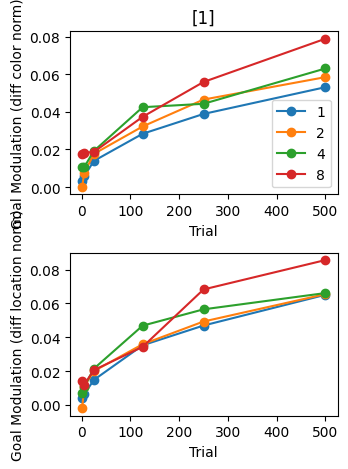

In [12]:
net = 1
lridx = 0
gridx = 0
#plot modulation over training
#plotphases = [0,1,5]
phase = 5
plt.figure()
for gridx,group in enumerate(lrgroups):
    for lridx,lr in enumerate(lrs):
        plt.subplot(2,2,gridx+1)
        plt.plot(num_trials,np.squeeze(goalmodulation[gridx,lridx,:,phase,net]-ctlmodulation_diffcolor[gridx,lridx,:,phase,net]),'-o',label=lr)
        plt.xlabel('Trial')
        plt.title(group)
        plt.ylabel('Goal Modulation (diff color norm)')
        plt.legend()

        plt.subplot(2,2,gridx+3)
        plt.plot(num_trials,np.squeeze(goalmodulation[gridx,lridx,:,phase,net]-ctlmodulation_diffloc[gridx,lridx,:,phase,net]),'-o')
        plt.xlabel('Trial')
        plt.ylabel('Goal Modulation (diff location norm)')

plt.tight_layout()
saveFig(plt.gcf(),'Rollout_LRGroup',savefolder,
        filetype='pdf')
plt.show()

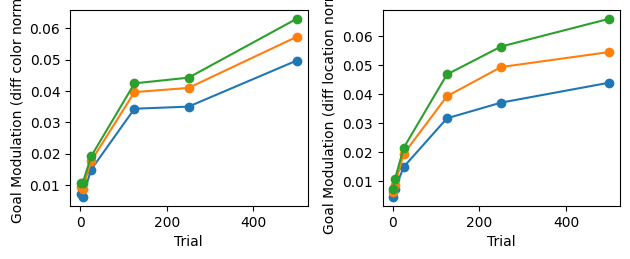

In [13]:
net = 1
lridx = 2
gridx = 0
#plot modulation over training
plotphases = [0,1,5]
plt.figure()
for pidx,phase in enumerate(plotphases):
    plt.subplot(2,2,1)
    plt.plot(num_trials,np.squeeze(goalmodulation[gridx,lridx,:,phase,net]-ctlmodulation_diffcolor[gridx,lridx,:,phase,net]),'-o')
    plt.xlabel('Trial')
    plt.ylabel('Goal Modulation (diff color norm)')

    plt.subplot(2,2,2)
    plt.plot(num_trials,np.squeeze(goalmodulation[gridx,lridx,:,phase,net]-ctlmodulation_diffloc[gridx,lridx,:,phase,net]),'-o')
    plt.xlabel('Trial')
    plt.ylabel('Goal Modulation (diff location norm)')

plt.tight_layout()
plt.show()

In [14]:
np.squeeze(goalmodulation[:,lridx,:,0,0])

array([0.00486419, 0.01196867, 0.0173562 , 0.03776253, 0.04801009,
       0.06040408])

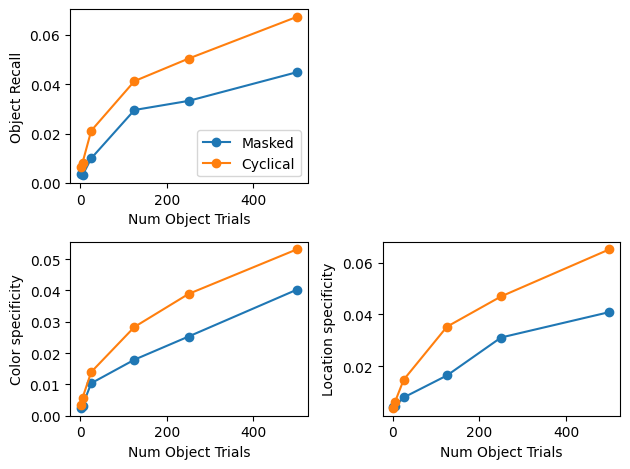

In [34]:
#net = 1
lridx = 0
phidx = 0
gridx = 0
#plot modulation over training
plotphases = [0,1,5]
plt.figure()
#for nidx,net in enumerate(nets):
plt.subplot(2,2,1)
plt.plot(num_trials,np.squeeze(goalmodulation[gridx,lridx,:,0,0]),'-o')
plt.plot(num_trials,np.squeeze(goalmodulation[gridx,lridx,:,5,1]),'-o')
plt.xlabel('Num Object Trials')
plt.ylabel('Object Recall')
plt.legend(['Masked','Cyclical'])

plt.subplot(2,2,3)
plt.plot(num_trials,np.squeeze(goalmodulation[gridx,lridx,:,0,0]-ctlmodulation_diffcolor[gridx,lridx,:,0,0]),'-o')
plt.plot(num_trials,np.squeeze(goalmodulation[gridx,lridx,:,5,1]-ctlmodulation_diffcolor[gridx,lridx,:,5,1]),'-o')
plt.xlabel('Num Object Trials')
plt.ylabel('Color specificity')
#plt.legend(['Masked','Cyclical'])

plt.subplot(2,2,4)
plt.plot(num_trials,np.squeeze(goalmodulation[gridx,lridx,:,0,0]-ctlmodulation_diffloc[gridx,lridx,:,0,0]),'-o')
plt.plot(num_trials,np.squeeze(goalmodulation[gridx,lridx,:,5,1]-ctlmodulation_diffloc[gridx,lridx,:,5,1]),'-o')
plt.xlabel('Num Object Trials')
plt.ylabel('Location specificity')

plt.tight_layout()
saveFig(plt.gcf(),'CompareObjectLearning',savefolder,
        filetype='pdf')
plt.show()

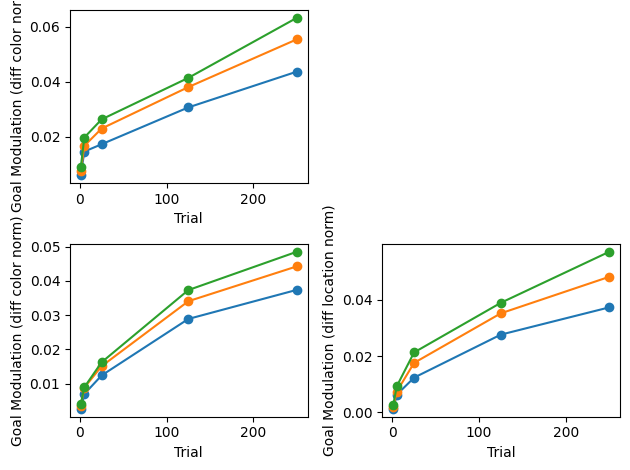

In [90]:
net = 1
lridx = 0
#plot modulation over training
plotphases = [0,1,5]
plt.figure()
for pidx,phase in enumerate(plotphases):
    plt.subplot(2,2,1)
    plt.plot(num_trials,np.squeeze(goalmodulation[:,lridx,:,phase,net]),'-o')
    plt.xlabel('Trial')
    plt.ylabel('Goal Modulation (diff color norm)')
    
    plt.subplot(2,2,3)
    plt.plot(num_trials,np.squeeze(goalmodulation[:,lridx,:,phase,net]-ctlmodulation_diffcolor[:,lridx,:,phase,net]),'-o')
    plt.xlabel('Trial')
    plt.ylabel('Goal Modulation (diff color norm)')

    plt.subplot(2,2,4)
    plt.plot(num_trials,np.squeeze(goalmodulation[:,lridx,:,phase,net]-ctlmodulation_diffloc[:,lridx,:,phase,net]),'-o')
    plt.xlabel('Trial')
    plt.ylabel('Goal Modulation (diff location norm)')

plt.tight_layout()
saveFig(plt.gcf(),'ThetaPhase',savefolder,
        filetype='pdf')
plt.show()

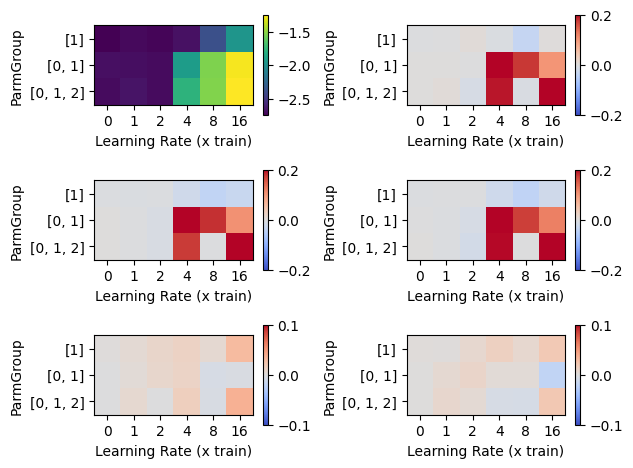

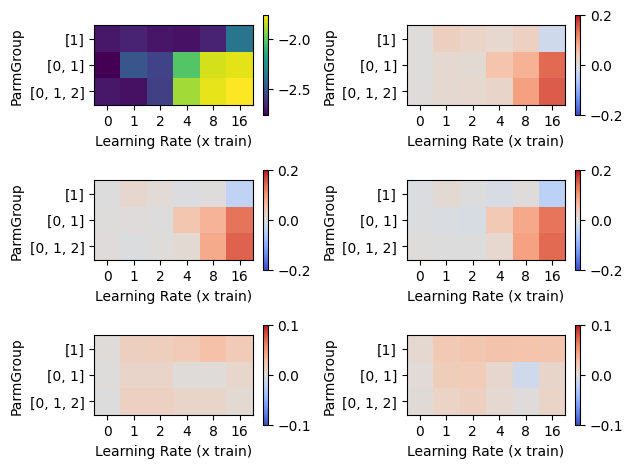

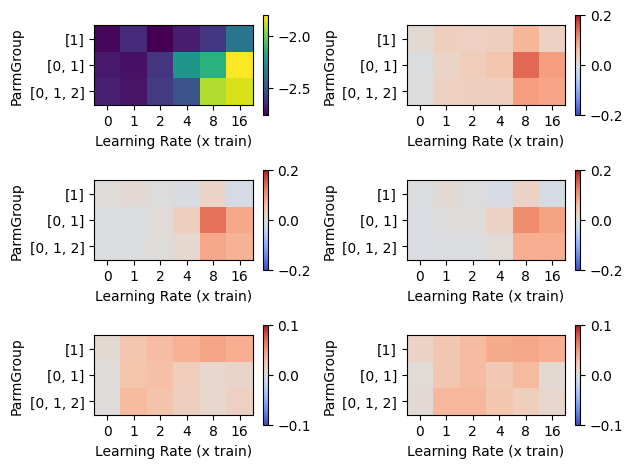

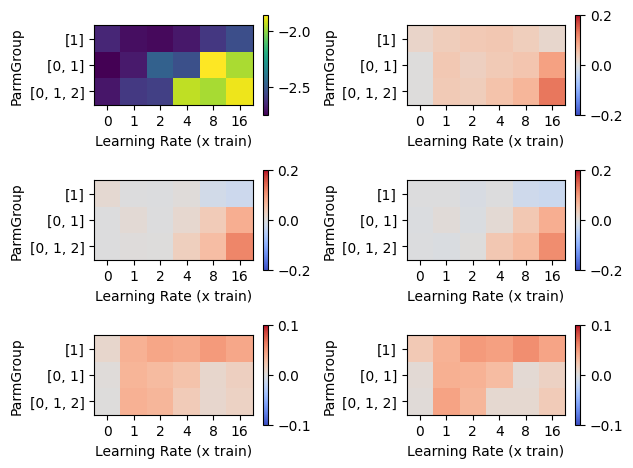

In [9]:
#whichNTrials = 2
for whichNTrials,ntrial in enumerate(num_trials):
    plt.figure()
    plt.subplot(3,2,1)
    plt.imshow(np.log10(object_pred_loss[:,:,whichNTrials]))
    plt.yticks(ticks=np.arange(len(lrgroups)), labels=lrgroups)
    plt.xticks(ticks=np.arange(len(lrs)), labels=lrs)
    plt.xlabel('Learning Rate (x train)')
    plt.ylabel('ParmGroup')
    plt.colorbar()

    plt.subplot(3,2,2)
    plt.imshow(goalmodulation[:,:,whichNTrials],vmin=-0.2,vmax=0.2,
              cmap='coolwarm')
    plt.yticks(ticks=np.arange(len(lrgroups)), labels=lrgroups)
    plt.xticks(ticks=np.arange(len(lrs)), labels=lrs)
    plt.xlabel('Learning Rate (x train)')
    plt.ylabel('ParmGroup')
    plt.colorbar()

    plt.subplot(3,2,3)
    plt.imshow(ctlmodulation_diffcolor[:,:,whichNTrials],vmin=-0.2,vmax=0.2,
              cmap='coolwarm')
    plt.yticks(ticks=np.arange(len(lrgroups)), labels=lrgroups)
    plt.xticks(ticks=np.arange(len(lrs)), labels=lrs)
    plt.xlabel('Learning Rate (x train)')
    plt.ylabel('ParmGroup')
    plt.colorbar()

    plt.subplot(3,2,4)
    plt.imshow(ctlmodulation_diffloc[:,:,whichNTrials],vmin=-0.2,vmax=0.2,
              cmap='coolwarm')
    plt.yticks(ticks=np.arange(len(lrgroups)), labels=lrgroups)
    plt.xticks(ticks=np.arange(len(lrs)), labels=lrs)
    plt.xlabel('Learning Rate (x train)')
    plt.ylabel('ParmGroup')
    plt.colorbar()

    plt.subplot(3,2,5)
    plt.imshow(goalmodulation[:,:,whichNTrials]-ctlmodulation_diffcolor[:,:,whichNTrials],
               vmin=-0.1,vmax=0.1,
              cmap='coolwarm')
    plt.yticks(ticks=np.arange(len(lrgroups)), labels=lrgroups)
    plt.xticks(ticks=np.arange(len(lrs)), labels=lrs)
    plt.xlabel('Learning Rate (x train)')
    plt.ylabel('ParmGroup')
    plt.colorbar()

    plt.subplot(3,2,6)
    plt.imshow(goalmodulation[:,:,whichNTrials]-ctlmodulation_diffloc[:,:,whichNTrials],
               vmin=-0.1,vmax=0.1,
              cmap='coolwarm')
    plt.yticks(ticks=np.arange(len(lrgroups)), labels=lrgroups)
    plt.xticks(ticks=np.arange(len(lrs)), labels=lrs)
    plt.xlabel('Learning Rate (x train)')
    plt.ylabel('ParmGroup')
    plt.colorbar()

    plt.tight_layout()
    saveFig(plt.gcf(),'ObjectLearningLRParms_'+str(ntrial)+_+netname,savefolder,
            filetype='pdf')
    plt.show()

AttributeError: 'FigureCanvasAgg' object has no attribute 'set_window_title'

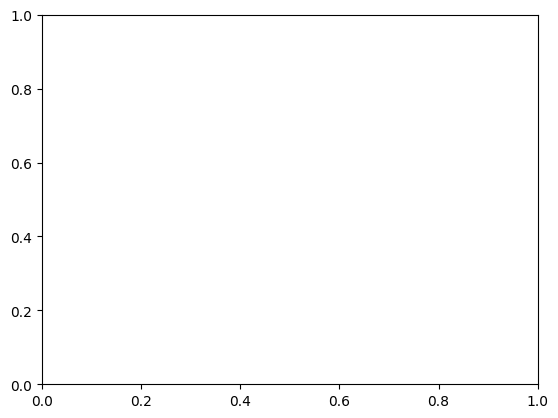

In [55]:
plot_env(OMT.env_object)
saveFig(plt.gcf(),'ObjectEnv',savefolder,
        filetype='pdf')
plt.show()
